# Actividad Modulo 7
## Pandas: Dataframes, lectura y exportación de archivos 
### Ejercicio: 
Descargue del internet el archivo ”Iris.csv” e impórtelo a Python de manera que pueda contestar (mediante el código respectivo) a las preguntas siguientes: 

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


1) Determine en una sola tabla la media, desviación estándar y la mediana (percentil 50) para el ancho del pétalo por cada tipo de flor para aquellos registros cuyo ancho del sépalo es mayor o igual a 3.5 y el largo del sépalo es mayor que 5. 

2) Calcule el número de registros que se utilizaron para obtener los resultados del problema 1. 

In [3]:
iris[(iris["SepalWidthCm" ]>= 3.5) & (iris["SepalLengthCm" ]>= 5)].groupby("Species").agg({"PetalWidthCm":["mean","median","std","count"]})

PetalWidthCm                       
                       mean median       std count
Species                                           
Iris-setosa        0.285000   0.25  0.118210    20
Iris-virginica     2.233333   2.20  0.251661     3


3) Agregue una nueva columna al DataFrame generado al problema 1, que sea resultado de estandarizar los valores del ancho del pétalo para cada registro. Denomine a dicha columna “petal.width.st” y calcúlela de la siguiente manera: 

(petal.width – Media(petal.width))/Desv. Estándar(petal.width)

Esto es, a cada observación de la columna “petal.width” se le resta su media de columna para luego dividir entre la desviación estándar de su columna.



In [4]:
Iris_setosa = iris[(iris["SepalWidthCm" ]>= 3.5) & (iris["SepalLengthCm" ]>= 5) & (iris["Species" ] == "Iris-setosa") ]
Iris_setosa["petal.width.st"] = Iris_setosa["PetalWidthCm"].apply(lambda x:(x-Iris_setosa["PetalWidthCm"].mean())/Iris_setosa["PetalWidthCm"].std() )

C:\Users\taoiz\AppData\Local\Temp\ipykernel_4632\4279747671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iris_setosa["petal.width.st"] = Iris_setosa["PetalWidthCm"].apply(lambda x:(x-Iris_setosa["PetalWidthCm"].mean())/Iris_setosa["PetalWidthCm"].std() )


In [5]:
Iris_virginica = iris[(iris["SepalWidthCm" ]>= 3.5) & (iris["SepalLengthCm" ]>= 5) & (iris["Species" ] == "Iris-virginica") ]
Iris_virginica["petal.width.st"] = Iris_virginica["PetalWidthCm"].apply(lambda x:(x-Iris_virginica["PetalWidthCm"].mean())/Iris_virginica["PetalWidthCm"].std() )

C:\Users\taoiz\AppData\Local\Temp\ipykernel_4632\3113833852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iris_virginica["petal.width.st"] = Iris_virginica["PetalWidthCm"].apply(lambda x:(x-Iris_virginica["PetalWidthCm"].mean())/Iris_virginica["PetalWidthCm"].std() )


In [6]:
Iris2 = Iris_setosa.merge(Iris_virginica,how='outer')
Iris2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,petal.width.st
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-0.719057
1,5,5.0,3.6,1.4,0.2,Iris-setosa,-0.719057
2,6,5.4,3.9,1.7,0.4,Iris-setosa,0.972842
3,11,5.4,3.7,1.5,0.2,Iris-setosa,-0.719057
4,15,5.8,4.0,1.2,0.2,Iris-setosa,-0.719057
5,16,5.7,4.4,1.5,0.4,Iris-setosa,0.972842
6,17,5.4,3.9,1.3,0.4,Iris-setosa,0.972842
7,18,5.1,3.5,1.4,0.3,Iris-setosa,0.126892
8,19,5.7,3.8,1.7,0.3,Iris-setosa,0.126892
9,20,5.1,3.8,1.5,0.3,Iris-setosa,0.126892


4) Mantenga en el nuevo DataFrame del problema 3 las columnas “variety” y “petal.width.st”. Renómbrelas como “Variedad” y “Ancho Est.  Pétalo” 


In [7]:
Iris2.rename(columns = {"Species":"Variedad","petal.width.st":"Ancho Est. Pétalo"},inplace=True)
Iris2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Variedad,Ancho Est. Pétalo
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-0.719057
1,5,5.0,3.6,1.4,0.2,Iris-setosa,-0.719057
2,6,5.4,3.9,1.7,0.4,Iris-setosa,0.972842
3,11,5.4,3.7,1.5,0.2,Iris-setosa,-0.719057
4,15,5.8,4.0,1.2,0.2,Iris-setosa,-0.719057
5,16,5.7,4.4,1.5,0.4,Iris-setosa,0.972842
6,17,5.4,3.9,1.3,0.4,Iris-setosa,0.972842
7,18,5.1,3.5,1.4,0.3,Iris-setosa,0.126892
8,19,5.7,3.8,1.7,0.3,Iris-setosa,0.126892
9,20,5.1,3.8,1.5,0.3,Iris-setosa,0.126892


5) Exporte el resultado del DataFrame obtenido en el problema 4 a un archivo denominado “Iris2.csv”. 

In [8]:
Iris2.to_csv = "Iris2.csv"

6) Investigue cómo generar un gráfico de dispersión para la base original Iris que relacione la variable “petal.width” con “petal.length”. Sugerencia: Revisar la instrucción .plot(x,y,kind)

<Axes: ylabel='PetalWidthCm'>

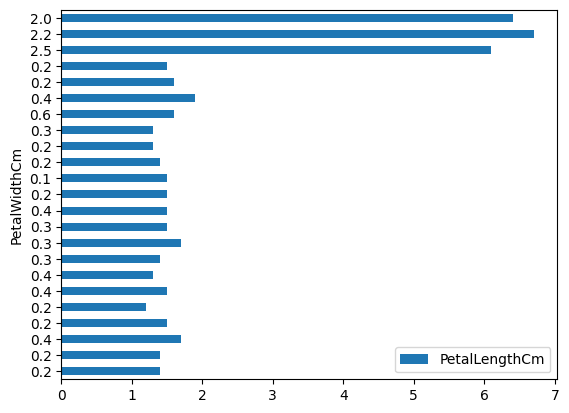

In [9]:
Iris2.plot("PetalWidthCm","PetalLengthCm",kind = "barh")

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

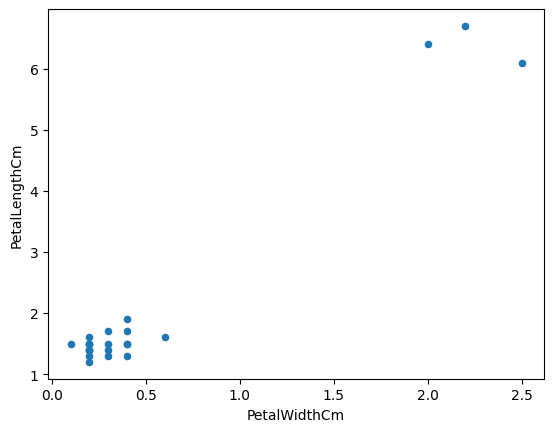

In [10]:
Iris2.plot("PetalWidthCm","PetalLengthCm",kind = "scatter")